In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install scipy

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.stats import pearsonr

## 242 chords ET

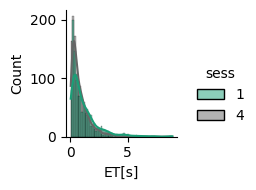

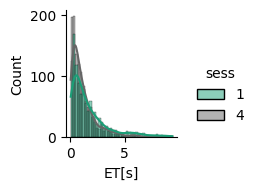

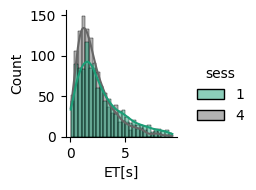

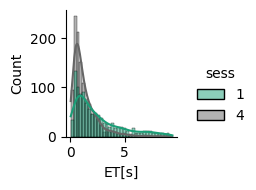

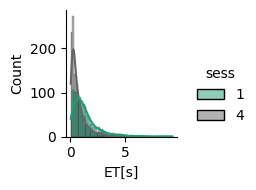

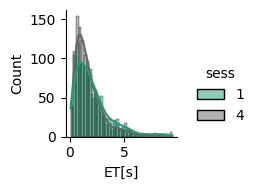

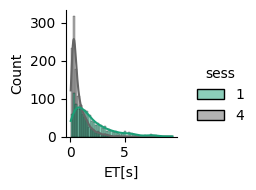

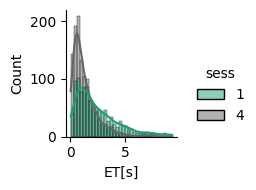

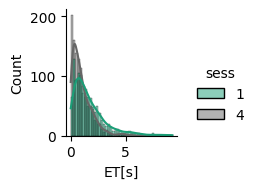

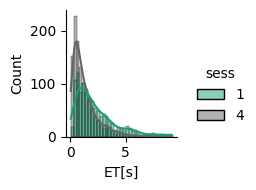

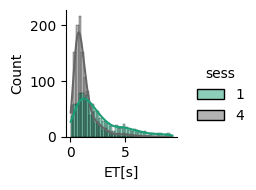

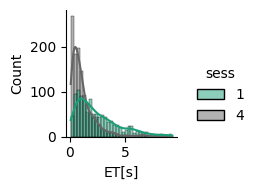

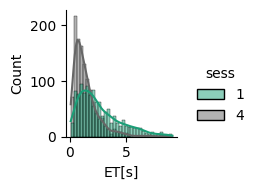

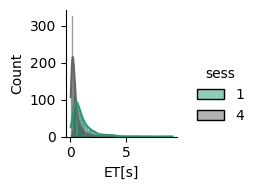

In [66]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_all.tsv')
D['ET'] = D['ET'].astype('float64')/1000
D = D[((D.sess==1) | (D.sess==4)) & (D.trialCorr==1)]
sn_list = D.sn.unique()

cmap = plt.get_cmap('Dark2')
for i, sn in enumerate(sn_list):
    # select subject data:
    D_sn = D[(D.sn == sn)]
    # sns.displot(data=D_sn, x="ET", hue="day", kind="hist")
    sns.displot(data=D_sn, x="ET", hue="sess", kde=True, height=2, palette=[mcolors.to_hex(cmap(0)), mcolors.to_hex(cmap(7))])
    plt.xlabel('ET[s]')
    plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_{sn}_ET.pdf')

## Distribution of MD day 1 to 4

## Chord-specific learning MD

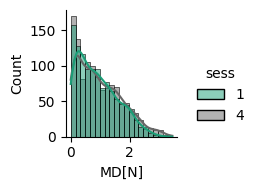

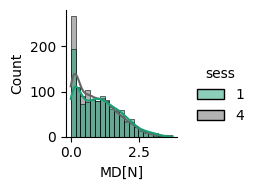

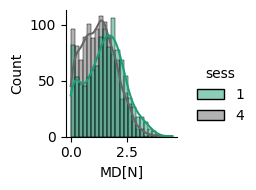

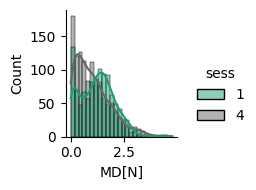

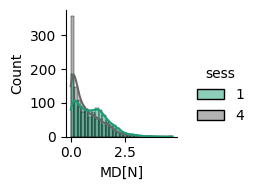

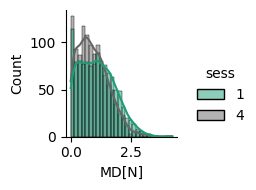

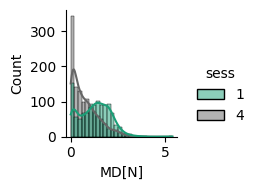

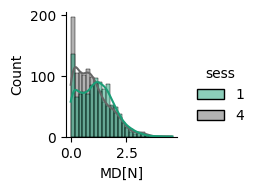

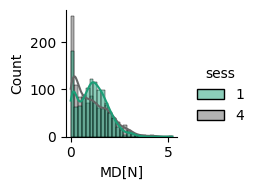

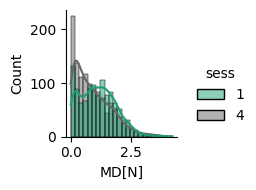

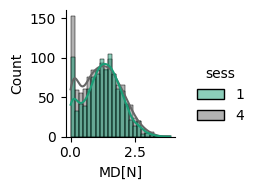

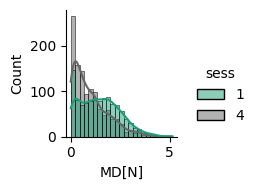

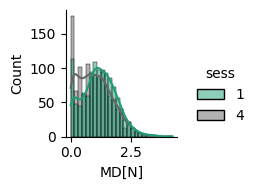

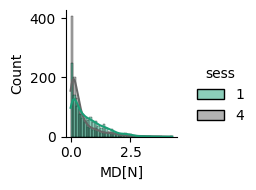

In [70]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_all.tsv')
D['MD'] = D['MD'].astype('float64')
D = D[((D.sess==1) | (D.sess==4)) & (D.trialCorr==1)]
sn_list = D.sn.unique()

cmap = plt.get_cmap('Dark2')
for i, sn in enumerate(sn_list):
    # select subject data:
    D_sn = D[(D.sn == sn)]
    # sns.displot(data=D_sn, x="ET", hue="day", kind="hist")
    sns.displot(data=D_sn, x="MD", hue="sess", kde=True, height=2, palette=[mcolors.to_hex(cmap(0)), mcolors.to_hex(cmap(7))])
    plt.xlabel('MD[N]')
    plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_{sn}_MD.pdf')

## Chord-specific learning ET

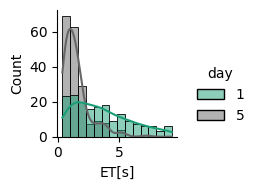

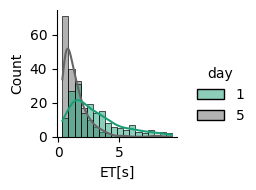

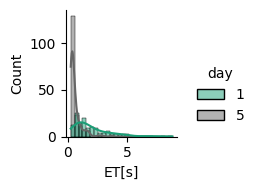

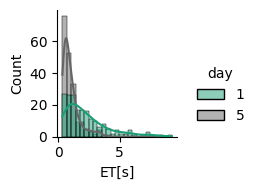

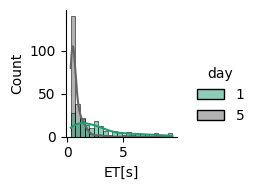

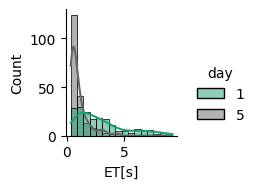

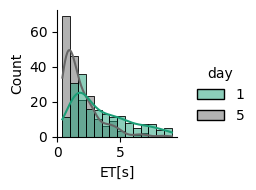

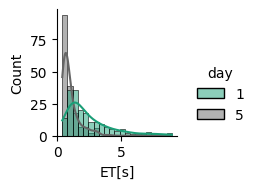

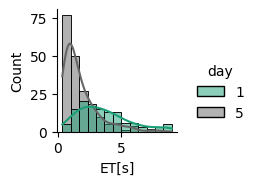

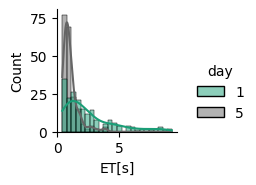

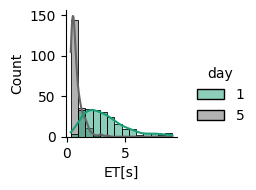

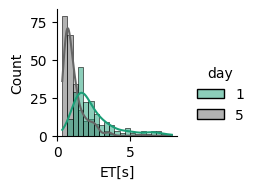

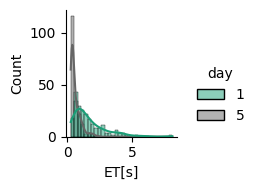

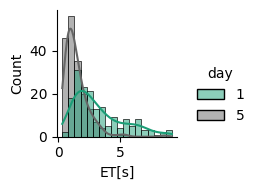

In [61]:
# load the data:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D['ET'] = D['ET']/1000
D = D[(D.trained==1) & ((D.day==1) | (D.day==5)) & (D.trial_correct==1)]
sn_list = D.sn.unique()

cmap = plt.get_cmap('Dark2')
for i, sn in enumerate(sn_list):
    # select subject data:
    D_sn = D[(D.sn == sn)]
    # sns.displot(data=D_sn, x="ET", hue="day", kind="hist")
    sns.displot(data=D_sn, x="ET", hue="day", kde=True, height=2, palette=[mcolors.to_hex(cmap(0)), mcolors.to_hex(cmap(7))])
    plt.xlabel('ET[s]')
    plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc2_{sn}_ET.pdf')

## Chord-specific learning MD

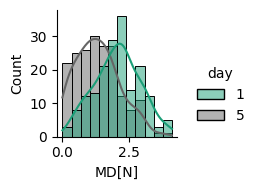

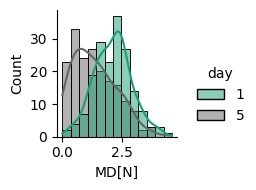

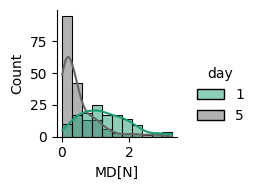

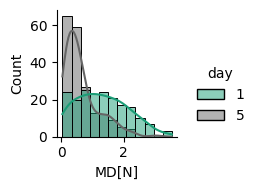

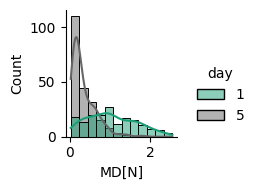

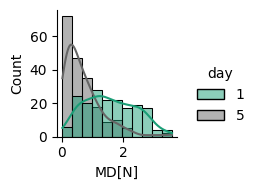

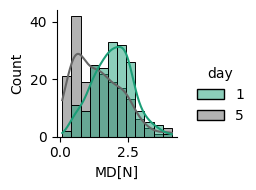

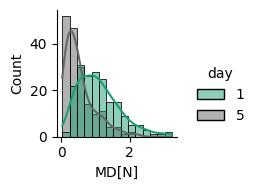

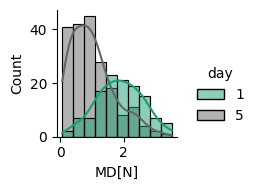

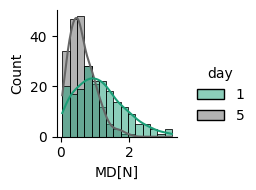

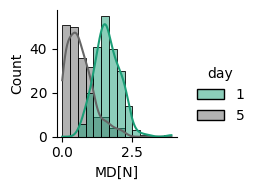

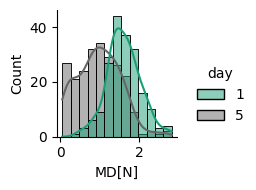

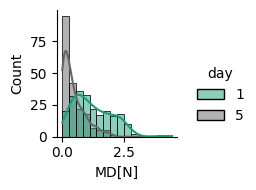

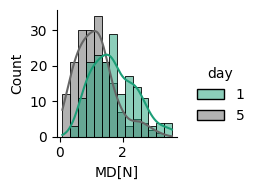

In [62]:
# load the data:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D = D[(D.trained==1) & ((D.day==1) | (D.day==5)) & (D.trial_correct==1)]
sn_list = D.sn.unique()

cmap = plt.get_cmap('Dark2')
for i, sn in enumerate(sn_list):
    # select subject data:
    D_sn = D[(D.sn == sn)]
    # sns.displot(data=D_sn, x="ET", hue="day", kind="hist")
    sns.displot(data=D_sn, x="MD", hue="day", kde=True, height=2, palette=[mcolors.to_hex(cmap(0)), mcolors.to_hex(cmap(7))])
    plt.xlabel('MD[N]')
    plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc2_{sn}_MD.pdf')

## ET corr MD

Text(0, 0.5, 'tiral by tiral correlation')

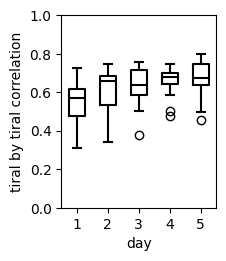

In [139]:
# load the data:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D = D[D.trial_correct==1]
D['ET'] = D['ET']/1000
sn_list = D['sn'].unique()
days = D['day'].unique()

df = pd.DataFrame(columns=['sn','rho','day','pval','chords'])
rho_vec = []
p_vec = []
sn_vec = []
day_vec = []
chord_vec = []
for sn in sn_list:
    for day in days:
            D_sn = D[(D['sn'] == sn) & (D['day'] == day)]
            x = D_sn['ET']
            y = D_sn['MD']
            r, p = pearsonr(x, y)
            rho_vec.append(r)
            p_vec.append(p)
            sn_vec.append(sn)
            day_vec.append(day)

df['sn'] = sn_vec
df['rho'] = rho_vec
df['day'] = day_vec
df['pval'] = p_vec

# box plot of correlation between ET and MD
ax, fig = plt.subplots(figsize=(2, 2.5))
sns.boxplot(data=df, x='day', y='rho', width=0.5, fill=False, linewidth=1.5, color='black')
plt.ylim((0, 1))
plt.ylabel('tiral by tiral correlation')

## Scatter ET vs MD

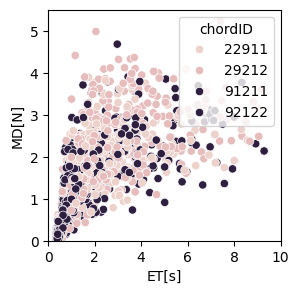

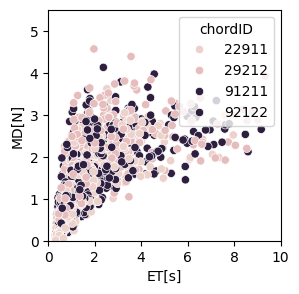

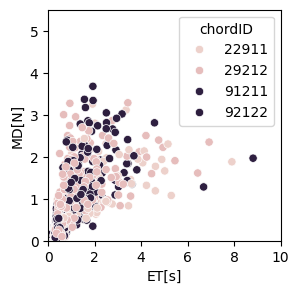

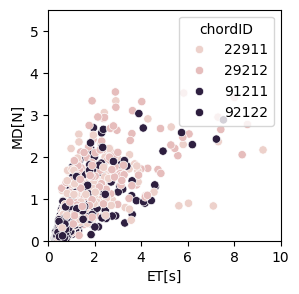

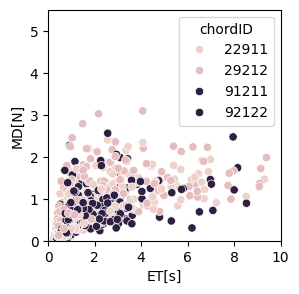

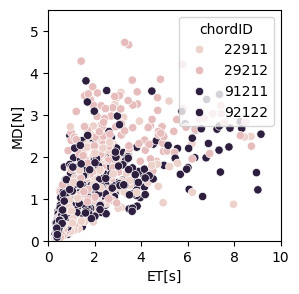

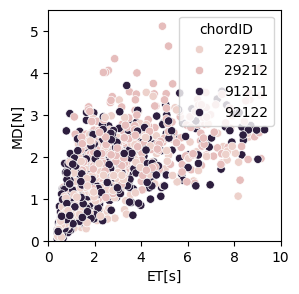

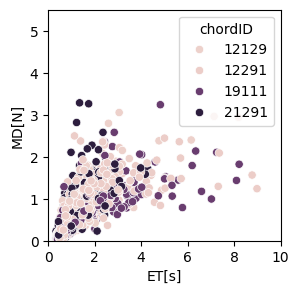

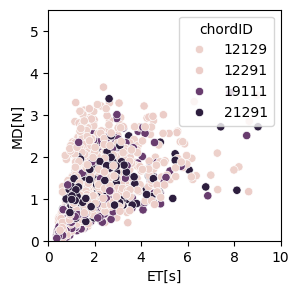

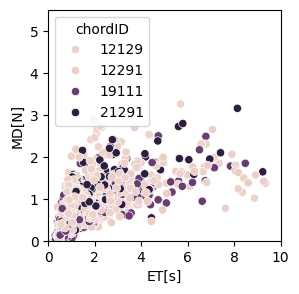

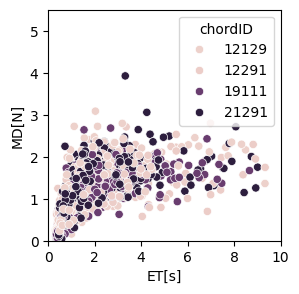

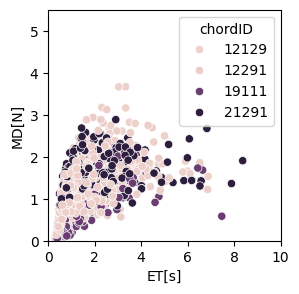

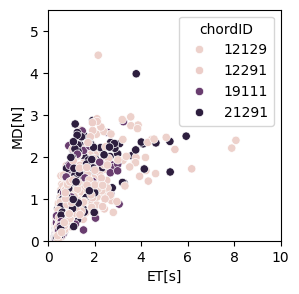

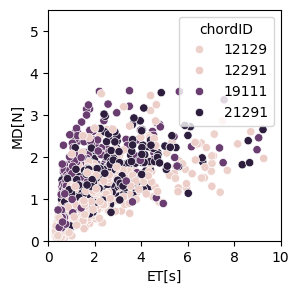

In [100]:
# load the data:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D['ET'] = D['ET']/1000
chords = D['chordID'].unique()

# select portion of data:
# D = D[(D.chordID == chords[0]) & (D.trial_correct==1)]
D = D[(D.trained == 1) & (D.trial_correct==1)]
sn_list = D.sn.unique()

cmap = plt.get_cmap('Dark2')
for i, sn in enumerate(sn_list):
    # select subject data:
    D_sn = D[(D.sn == sn)]
    # sns.displot(data=D_sn, x="ET", hue="day", kind="hist")
    ax, fig = plt.subplots(figsize=(3, 3))
    sns.scatterplot(data=D_sn, x="ET", y="MD", hue="chordID")
    plt.xlabel('ET[s]')
    plt.ylabel('MD[N]')
    plt.xlim((0, 10))
    plt.ylim((0, 5.5))
    plt.show()
    # plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc2_{sn}_c.pdf')

## reaction time 242 chords

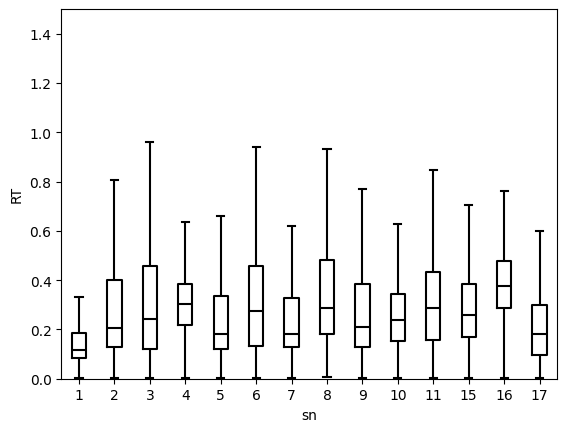

In [162]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc1_all.tsv')
D['RT'] = D['RT'].astype('float64')/1000
D = D[(D.trialCorr==1)]
sn_list = D.sn.unique()

sns.boxplot(data=D, x='sn', y='RT', width=0.4, fill=False, linewidth=1.5, color='black', fliersize=0)
plt.ylim((0,1.5))
plt.show()

## Reaction time chord-specific

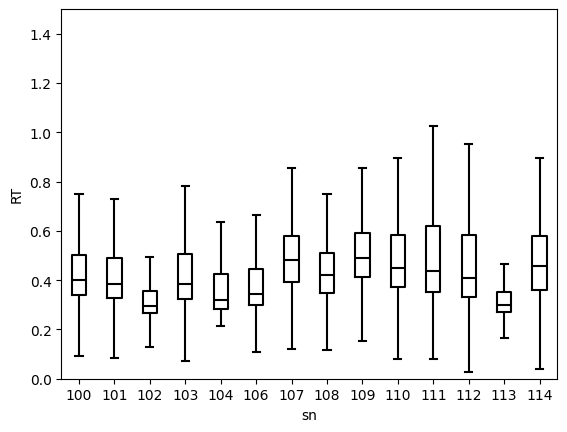

In [160]:
# load the data:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D['RT'] = D['RT'].astype('float64')/1000
D = D[(D.trial_correct==1)]
sn_list = D.sn.unique()

sns.boxplot(data=D, x='sn', y='RT', width=0.4, fill=False, linewidth=1.5, color='black', fliersize=0)
plt.ylim((0,1.5))
plt.show()